In [52]:
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [53]:
dataset_games = pd.read_csv("/datasets/games.csv")

In [54]:
dataset_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [55]:
dataset_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Here we are able to check 11 columns, the details of these columns provides clear information there are NaN values, and possible duplicare values.

All the sales are categorize in float, the Critic Score is in float too and the User Score is in string (object)

# Clear empty values and fix duplicate values

In [56]:
dataset_games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [57]:
dataset_games[dataset_games["Name"].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [58]:
dataset_games = dataset_games.dropna(subset=["Name"])
dataset_games.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8576
User_Score         6699
Rating             6764
dtype: int64

The project description indicates that we need to check whether a game is successful or not, and we cannot determine a game's success if the name is missing. Therefore, those rows must be deleted.

One of the core aspects of handling this project is to study the genre, and those two rows do not contain that information. Thus, the evidence supports my assumption that these rows must be deleted.



In [59]:
year_mean = dataset_games['Year_of_Release'].mean()
dataset_games["Year_of_Release"].fillna(year_mean, inplace=True)
dataset_games.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8576
User_Score         6699
Rating             6764
dtype: int64

I tried to follow the best option in this situation to fill the empty values. Although 0 is not a date, I must say it is one of the best options to apply. Another alternative I consider, and which is also one of the greatest options, is to calculate the mean and apply it.



In [60]:
dataset_games["User_Score"] = dataset_games["User_Score"].replace("tbd", np.nan)  # This replace tbd to NaN
dataset_games["User_Score"] = pd.to_numeric(dataset_games["User_Score"], errors="coerce") # This changes any other value that is not a float number to NaN


This code helps convert any value that is 'tbd' (To Be Determined) to NaN. Additionally, the second line of code converts any value that is not a float to NaN. This is very helpful for cleaning the data.


    

I consider I should not modify the rest of the empty values as those values are important to study the rest of the project. For example,  the NaN in User_Score indicates the the user never provided an score to the game, if we delete or modify the NaN, that could affect the game score.   

In [61]:
dataset_games.duplicated().sum()

0

We do no have duplicate values.

# Correct the data

In [62]:
dataset_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [63]:
dataset_games["Year_of_Release"] = dataset_games["Year_of_Release"].round().astype("Int64")


I changed the 'Year_of_Release' column from float to integer in order to better visualize and work with the data.

Why didn’t I convert the column to datetime? It’s simple, because the column only contains the year, without a specific month or day. For that reason, it makes more sense to keep it as an integer


In [64]:
dataset_games.columns = dataset_games.columns.str.lower()
dataset_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


The previous code did a good job by changing the name of the columnms to lowercase.

In [65]:
dataset_games["total_sales"] = dataset_games["na_sales"] + dataset_games["eu_sales"] + dataset_games["jp_sales"] + dataset_games["other_sales"]

At this time, the new column has been created with the total amount of the sales

Finally, I have determined that the columns we worked on are:

'User_Score', where we replaced 'tbd' values;

'Year_of_Release', where we changed the data type; and

'Name', from which we deleted two rows that did not contain relevant information for the project.

Some improtant information to mention is that the NaN values are values that indicates the user, the critic or the raters did not give their opinions, is for that reason we cannot modify those values.

# Analyze Data

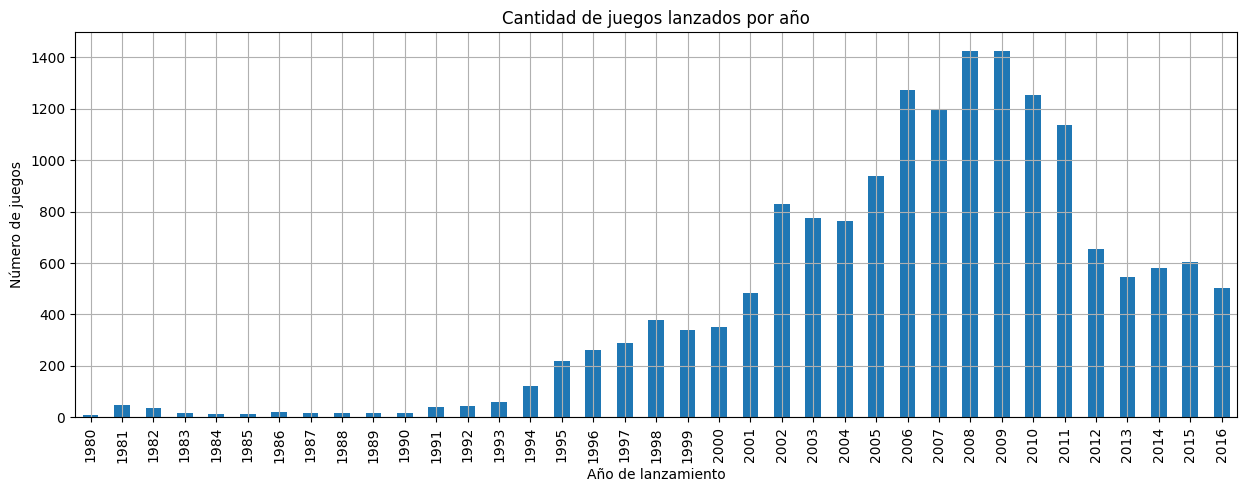

In [66]:
games_year = dataset_games.groupby("year_of_release")["name"].count()

games_year.plot(kind="bar", figsize=(15,5))
plt.title("Cantidad de juegos lanzados por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de juegos")
plt.grid(True)
plt.show()

I grouped the data by the year_of_release column and counted the number of games released each year using the name column. Then, I visualized the results with a graph to show how many games were launched per year

#

In [67]:
ranking_platforms = dataset_games.groupby("platform")["total_sales"].sum().reset_index()
top_5_platforms = ranking_platforms.sort_values(by="total_sales", ascending=False).head(5)

platforms_without_sales = dataset_games[dataset_games["total_sales"] == 0]["platform"].unique()
platforms = dataset_games.groupby(["year_of_release", "platform"])["total_sales"].agg(["min", "max"])

In [68]:
top_5_platforms.head()

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


The dataframe created "top_5_platforms" sjows the top 5 platforms with more sales. The procedure to do that was made by creating a groupby.

In [69]:
platforms.head()

min   max
year_of_release platform            
1980            2600      0.23  4.31
1981            2600      0.13  4.50
1982            2600      0.14  7.81
1983            2600      0.16  1.31
                NES       1.10  3.20

Ths code answers the question we had at the beggining, we needed to have the min and the max amount per platform for its year

In [70]:
ventas_con_fecha = dataset_games[dataset_games["total_sales"] > 0]
inicio_final = ventas_con_fecha.groupby("platform")["year_of_release"].agg(["min", "max"])
inicio_final["duracion"] = inicio_final["max"] - inicio_final["min"] 
inicio_final = inicio_final.sort_values(by="duracion", ascending=False)
print(inicio_final.head())


           min   max  duracion
platform                      
PC        1985  2016        31
DS        1985  2013        28
2600      1980  2006        26
GB        1988  2006        18
PS        1994  2006        12


This code helps to understand how many years the platforms takes for its popularity, for exmaple; NES 1983  1994        11
 

#

In [71]:
dataset_filtrado = dataset_games[
    (dataset_games["year_of_release"] >= 2000) & 
    (dataset_games["year_of_release"] <= 2016)
]
print(dataset_filtrado["year_of_release"].min())
print(dataset_filtrado["year_of_release"].max())
print(dataset_filtrado.shape)

2000
2016
(14739, 12)


I filtered the data from the year 2000 to 2016, as these years contain a good amount of records and reliable data quality. I verified that the range was correctly applied and that the number of available games is sufficient to build a predictive model for the year 2017

# 

Please also note according to the top 5 the platforms who has more sales are in the dataframe "top_5_platforms.""
This answer this question  "¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables."

In [72]:
top_5_platforms.head() #The first 5 platforms

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


In [73]:
top_5_platforms.tail() #The last 5 platforms

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


# 

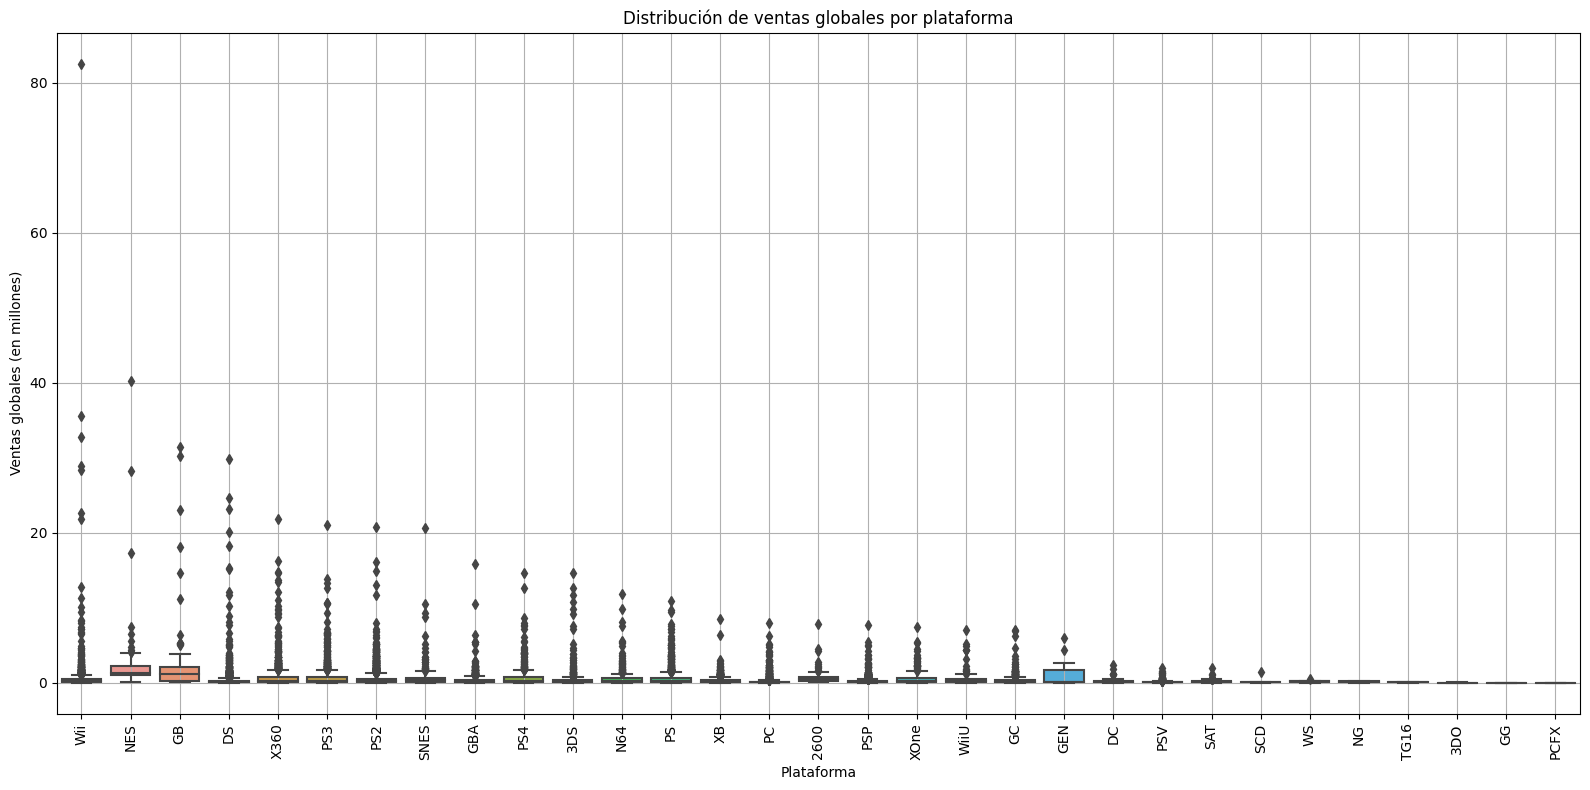

In [74]:
sales_filtered = dataset_games[dataset_games["total_sales"] > 0]

plt.figure(figsize=(16, 8))
sns.boxplot(x="platform", y="total_sales", data=sales_filtered)
plt.xticks(rotation=90)
plt.title("Distribución de ventas globales por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas globales (en millones)")
plt.grid(True)
plt.tight_layout()
plt.show()

This chart shows global video game sales by platform (such as Wii, NES, PS3, etc.). Each dot represents a game.

Some platforms, like Wii, NES, and GB, have games that sold a lot. This is noticeable because they have many high scores, even some that are quite different from the rest (those are games that sold significantly more than the others).

Most platforms have low sales. The middle line in each box shows us roughly how much an average game sold.

Overall, there are few platforms where most games sell a lot. Most games sell poorly, but there are a few that do very well.

This chart helps to show that not all consoles have the same sales success, and that some games stand out much more than others.

In [75]:
dataset_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


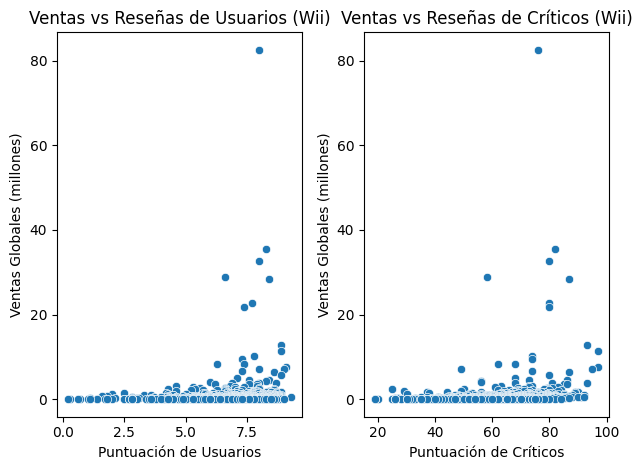

In [76]:
Wii_platform = dataset_games[dataset_games["platform"] == "Wii"]


plt.subplot(1, 2, 1)
sns.scatterplot(x="user_score", y="total_sales", data=Wii_platform)
plt.title("Ventas vs Reseñas de Usuarios (Wii)")
plt.xlabel("Puntuación de Usuarios")
plt.ylabel("Ventas Globales (millones)")

# Reviews of Critics and users
plt.subplot(1, 2, 2)
sns.scatterplot(x="critic_score", y="total_sales", data=Wii_platform)
plt.title("Ventas vs Reseñas de Críticos (Wii)")
plt.xlabel("Puntuación de Críticos")
plt.ylabel("Ventas Globales (millones)")

plt.tight_layout()
plt.show()

There are many good user scores and critic scores around 7.5. However, I would say that the correlation between sales and scores is not very strong and does not make a big difference.


# 

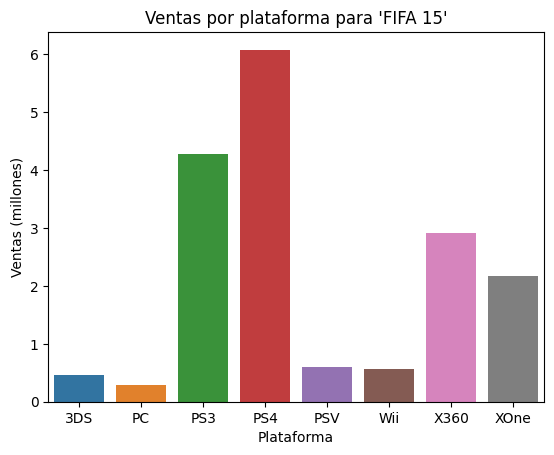

In [77]:
repeted_games = dataset_games["name"].value_counts() # This counts all the games for example nee dfor spead 12 
repeted_games = repeted_games[repeted_games > 1] # This says "I want all the games that are repeated for more than 1 time"

same_games = dataset_games[dataset_games["name"].isin(repeted_games.index)] # Save in same_games all the games that appear in repeated_games, that is, all the games that are repeated on more than one platform.


sales_per_platform = same_games.groupby(["name", "platform"])["total_sales"].sum().reset_index()

juego = "FIFA 15"
ventas_juego = sales_per_platform[sales_per_platform["name"] == juego]

sns.barplot(data=ventas_juego, x="platform", y="total_sales")
plt.title(f"Ventas por plataforma para '{juego}'")
plt.ylabel("Ventas (millones)")
plt.xlabel("Plataforma")
plt.show()

In this example we can see PS4 did more sales comparing toher platforms, but of couses it depend of the game.

# 

<AxesSubplot:xlabel='genre'>

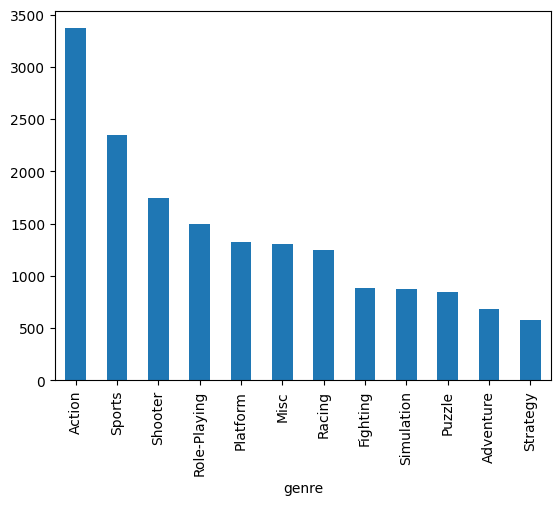

In [78]:
dataset_games["genre"].value_counts().plot(kind="bar")
dataset_games.groupby("genre")["total_sales"].sum().sort_values(ascending=False).plot(kind="bar")


#

# Profile per region 

In [79]:
top_na = dataset_games.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5)
top_eu = dataset_games.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5)
top_jp = dataset_games.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5)

top_na.head()

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

In [80]:
top_eu.head()

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

In [81]:
top_jp.head()

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

In [82]:
top_genre_na = dataset_games.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5)
top_genre_eu = dataset_games.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5)
top_genre_jp = dataset_games.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(5)

In [83]:
top_genre_na.head()

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

In [84]:
top_genre_eu.head()

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

In [85]:
top_genre_jp.head()

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

In [86]:
esrb_region = dataset_games.groupby("rating")[["na_sales", "eu_sales", "jp_sales"]].sum().sort_values(by="na_sales", ascending=False)
print(esrb_region)

        na_sales  eu_sales  jp_sales
rating                              
E        1292.99    710.25    198.11
T         759.75    427.03    151.40
M         748.48    483.97     64.24
E10+      353.32    188.52     40.20
K-A         2.56      0.27      1.46
EC          1.53      0.11      0.00
AO          1.26      0.61      0.00
RP          0.00      0.08      0.00


#

# Test statistical hypotheses

In [87]:
dataset_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [88]:
from scipy.stats import levene


xbox_scores = dataset_games[dataset_games["platform"] == "XOne"] # This code takes all the xbox one results
pc_scores = dataset_games[dataset_games["platform"] == "PC"] # This code takes all the PC results

xbox_scores = pd.to_numeric(xbox_scores["user_score"], errors="coerce").dropna() # This takes the NA values and delete them
pc_scores = pd.to_numeric (pc_scores["user_score"], errors="coerce").dropna() # This takes the NA values and delete them


st_levene, p_levene = levene(xbox_scores, pc_scores) # We create two variables, the first one takes the statistic value of Levene, and the second one receive the p value to determine if the varianza is the same or different
print("Valor p de Levene:", p_levene)   # if the null hipothesis is hiaher than 0.05 we cannot reject the hipothesis

equal_var = p_levene > 0.05 # This indicates that p_value is higher than 0.05 which confirms the null hipothesis

t_stat, p_value = st.ttest_ind(xbox_scores, pc_scores, equal_var=equal_var) # This line performs an student test for two independent samples
# We also set equal_var=equal_var, and since the p-value is 0.069, which is higher than 0.05, Python assumes that the variances of both groups are equal (or similar).


print("Estadístico t:", t_stat)
print("Valor p:", p_value)

alfa = 0.05
if p_value < alfa:
    print("Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa.")

Valor p de Levene: 0.2693951512047048
Estadístico t: -4.368333815003015
Valor p: 1.3896435533548819e-05
Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.


we cannot reject the null hypothesis as the p value of Levene is higher than 0.05

The average rating for Xbox One users is lower than that of PC users.

The Valor p says there is noe evidence that indicates the media is different, which means the difference between the platforms users are not the same.

In [89]:
action_genre = dataset_games[dataset_games["genre"] == "Action"] # This code takes all the Action one results
sports_genre = dataset_games[dataset_games["genre"] == "Sports"] # This code takes all the Sports one results

action_genre = pd.to_numeric(action_genre["user_score"], errors = "coerce").dropna() # I did not mention this before but the errors = "coerce" tells python, please give me NaN if you find a text like tbd or whatever that is not a number
sports_genre = pd.to_numeric(sports_genre["user_score"], errors = "coerce").dropna()

alfa = 0.05

results = st.ttest_ind(action_genre, sports_genre, equal_var=False)

print(f"Estadístico t: {results.statistic}") # This calculate how much is the differece between the media of one group of the other one
print(f"Valor p: {results.pvalue}")

if results.pvalue < alfa:
    print("Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa en las calificaciones promedio.")


Estadístico t: 1.57746791633354
Valor p: 0.11483818791498286
No se puede rechazar la hipótesis nula: no hay diferencia significativa en las calificaciones promedio.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

Please note that I used st.ttest_ind, which compares two independent groups — in this case, the Action and Sports genres.

The significance level (alpha) is set to 0.05. Since the p-value is 0.1148, which is greater than alpha, we fail to reject the null hypothesis.

Null hypothesis (H₀): The average user ratings for Action and Sports games are equal.

Alternative hypothesis (H₁): The average user ratings for Action and Sports games are different.

Based on the test results, we do not have enough evidence to support the alternative hypothesis. Therefore, we conclude that the difference in average ratings is not statistically significant.

#

# General conclusion

There is a lot of information we can talk about, and I will share the details I consider most important in this case.

Upon reviewing the analyzed columns, I can see that most customers do not share their opinions through scores. This means that game creators do not receive feedback on their games, which prevents them from fixing issues, developing better platforms, or improving their games. All the evidence presented above suggests that this situation causes the company to lose money.

I can also affirm that some users prefer to play certain games on specific platforms. The FIFA game was an excellent example, showing that most users like to play it on PS4 or PS5; of course, this depends on the game.

Regarding sales, I determined based on the information analyzed that there is no correlation between sales and scores. This means that a game could receive a low score and still achieve high sales. Sales depend more on the genre, the platform, and the region.
